# Basketball Analysis

## Mathematical Power Ranking using Chess ELO
ELO is used to correct for opponent strength (a win versus someone better than you is more meaningful than one against someone worse than you skill wise)

Basketball Power Ranking skewed because Western Conference much stronger than East (teams play other teams in their own conference 4 times and opposite conference teams 2 times) which makes Win-Loss inadequate to determine how to rank the entire NBA

### Import Libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

### Importing ELO file

In [25]:
#At the beginning of the season every team starts at 1000 ELO winning increases ones ELO while losing decreases
#Importing file that starts with every team having 1000 ELO and updated values as season progresses
ELO = pd.read_csv('ELO.csv')

### Previous Nights BoxScores from Basketball Reference

In [26]:
NBA_URL = 'https://www.basketball-reference.com/boxscores/'

### ELO updating function 

In [27]:
def ELO_pergame(URL):
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find(id = 'content')

    Game_sum = results.find('div', class_ = 'game_summaries')
    Game_sum = Game_sum.find_all('div', class_ = 'game_summary expanded nohover') #Finds number of games on a given day
    

    for i in range(len(Game_sum)):
        
        #Updating ELO for the team that won
        Game = Game_sum[i]
        Winner = Game.find('tr', class_= 'winner')
        Winner = Winner.find('a').text
        Winner_ind = ELO[ELO['Team']==Winner].index.tolist()
            
        #Updating ELO for the team that lost    
        Loser = Game.find('tr', class_= 'loser')
        Loser = Loser.find('a').text
        Loser_ind = ELO[ELO['Team']==Loser].index.tolist()
        
        #Calculates the Probability of each team winning based on ELO before the game
        Prob_Winner = 1/(1 + 10**((float(ELO['ELO'][Loser_ind]) - float(ELO['ELO'][Winner_ind]))/400))
        Prob_Loser = 1/(1 + 10**((float(ELO['ELO'][Winner_ind]) - float(ELO['ELO'][Loser_ind]))/400))

        #New ELO
        ELO.at[Winner_ind, 'ELO'] = float(ELO['ELO'][Winner_ind]) + 100*(1.0 - Prob_Winner)
        ELO.at[Loser_ind, 'ELO'] = float(ELO['ELO'][Loser_ind]) + 100*(0.0 - Prob_Loser)

In [40]:
ELO_pergame(NBA_URL)
ELO.to_csv('ELO.csv', index = False)

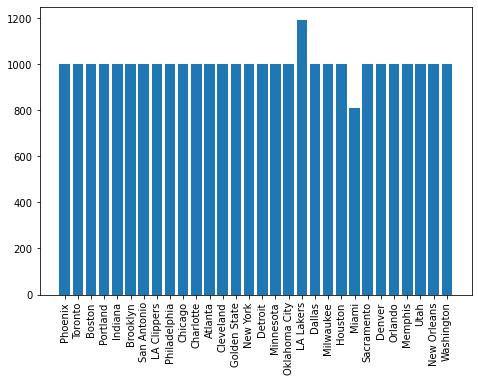

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ELO['Team'], ELO['ELO'])
plt.xticks(rotation = 90)
plt.show()